# prophetを用いた乗客数の予測

In [9]:
from passengers import Passengers, Line
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

In [3]:
file_name = 'data/t091307.xlsx'
line = '田園都市線'
skip_rows = list(range(0, 11)) + list(range(12, 15))
use_cols = list(range(1, 100))
denen = Line(file_name, line, skip_rows, use_cols)

ps = Passengers(line=denen)
display(ps.passengers.head())

/Users/toh/Documents/GitHub/Yokohama-passengers/passengers.py:57: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_sheet = df_sheet.convert_objects(convert_numeric=True)


,総数,たまプラーザ,あざみ野,江田,市が尾,藤が丘,青葉台,田奈,長津田,恩田,こどもの国,田園都市線総数
2000-04-01,7898886.0,1038447.0,1557603.0,469799.0,708228.0,433410.0,1634260.0,153682.0,1792431.0,0.0,111026.0,7898886.0
2000-05-01,8148675.0,1051305.0,1612115.0,479847.0,721383.0,437242.0,1677982.0,157103.0,1890997.0,0.0,120701.0,8148675.0
2000-06-01,7950917.0,1045811.0,1593399.0,478787.0,720891.0,428220.0,1615090.0,154114.0,1817606.0,0.0,96999.0,7950917.0
2000-07-01,7669313.0,1014065.0,1546628.0,458828.0,696377.0,418502.0,1543538.0,151814.0,1746031.0,0.0,93530.0,7669313.0
2000-08-01,7292316.0,927861.0,1491875.0,442153.0,664671.0,401388.0,1450025.0,150040.0,1663925.0,8122.0,92256.0,7292316.0


# prophet

In [4]:
df = ps.passengers['総数']
X_train = df[df.index < '2017-04-01']
X_test = df[df.index >= '2017-04-01']

X_train= X_train.reset_index()
X_train.columns = ['ds', 'y']
X_test= X_test.reset_index()
X_test.columns = ['ds', 'y']

In [7]:
model = Prophet(n_changepoints=5,
                yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False)
result = model.fit(X_train)

/Users/toh/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [28]:
future = model.make_future_dataframe(periods=24, freq='M')

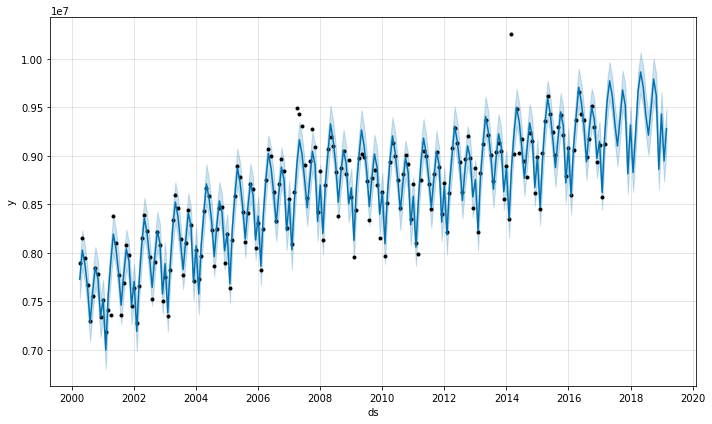

In [29]:
forecast = model.predict(future)
fig = model.plot(forecast)

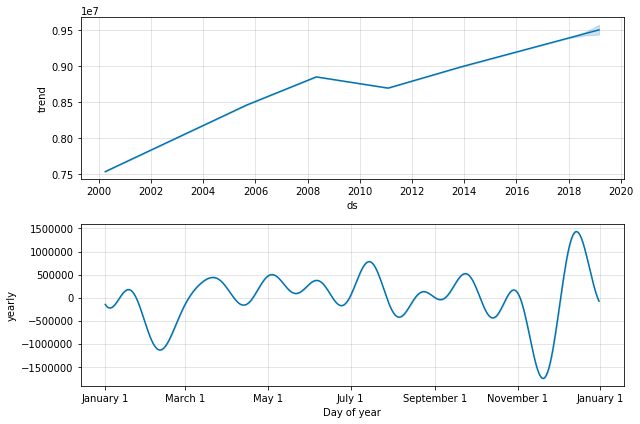

In [31]:
fig = model.plot_components(forecast)

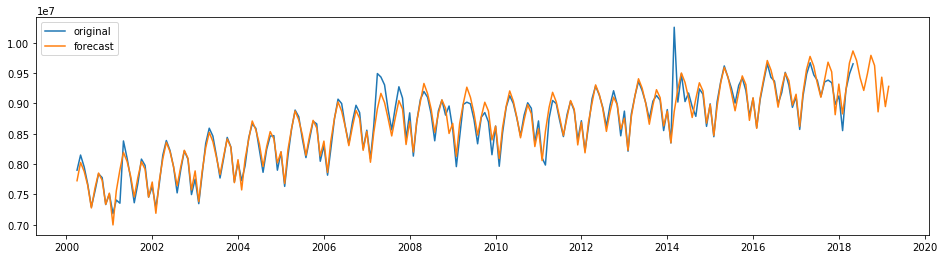

In [33]:
plt.figure(figsize=(16, 4))

plt.plot(df, label="original")
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.legend(loc='best')
plt.show()